<a href="https://colab.research.google.com/github/gkunal8019/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #df1 = pd.read_csv("/content/SeoulBikeData.csv",encoding = 'latin',parse_dates=['Date'])

In [3]:
df = pd.read_csv("/content/drive/MyDrive/capstone project/bike demand/SeoulBikeData.csv",encoding = 'unicode_escape')

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78,100,181,460,930,490
Hour,0,1,2,3,4,5,6,7,8,9
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5
Humidity(%),37,38,39,40,36,37,35,38,37,27
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.tail(10).T

,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
Date,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018,30/11/2018
Rented Bike Count,761,768,837,1047,1384,1003,764,694,712,584
Hour,14,15,16,17,18,19,20,21,22,23
Temperature(°C),7.8,7.0,7.2,6.0,4.7,4.2,3.4,2.6,2.1,1.9
Humidity(%),20,20,23,29,34,34,37,39,41,43
Wind speed (m/s),2.2,3.3,1.5,2.1,1.9,2.6,2.3,0.3,1.0,1.3
Visibility (10m),2000,1994,1945,1877,1661,1894,2000,1968,1859,1909
Dew point temperature(°C),-13.8,-14.4,-12.6,-10.7,-9.8,-10.3,-9.9,-9.9,-9.8,-9.3
Solar Radiation (MJ/m2),1.67,1.21,0.72,0.23,0.0,0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
len(df)

8760

In [8]:
df.shape

(8760, 14)

In [9]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## *There is no missing values*

In [13]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [14]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [15]:
df.columns 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

### convertion date time format

In [17]:
df['date']=pd.to_datetime(df['date'])

In [18]:
# Extracting new features from date and hour column
df['weekend'] = df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['timeshift'] = df['hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))
# Dropping the Date column
df.drop(columns=['date'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bike_count       8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temp             8760 non-null   float64
 3   humidity         8760 non-null   int64  
 4   wind             8760 non-null   float64
 5   visibility       8760 non-null   int64  
 6   dew_temp         8760 non-null   float64
 7   sunlight         8760 non-null   float64
 8   rain             8760 non-null   float64
 9   snow             8760 non-null   float64
 10  season           8760 non-null   object 
 11  holiday          8760 non-null   object 
 12  functioning_day  8760 non-null   object 
 13  weekend          8760 non-null   int64  
 14  timeshift        8760 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 1.0+ MB


In [20]:
# Checking unique value
df.apply(lambda x: len(x.unique()))

bike_count         2166
hour                 24
temp                546
humidity             90
wind                 65
visibility         1789
dew_temp            556
sunlight            345
rain                 61
snow                 51
season                4
holiday               2
functioning_day       2
weekend               2
timeshift             3
dtype: int64

In [21]:
#EXCLUDE'OBJECT'
numeric_features= df.select_dtypes(exclude='object')
numeric_features

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0


In [22]:
df.corr()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,weekend
bike_count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-3.225936e-02
hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,-2.300554e-17
temp,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-1.297241e-02
humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-3.674982e-02
wind,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-2.239107e-02
visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,3.064954e-02
dew_temp,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-2.896569e-02
sunlight,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,8.271095e-03
rain,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.427960e-02
snow,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-2.255705e-02


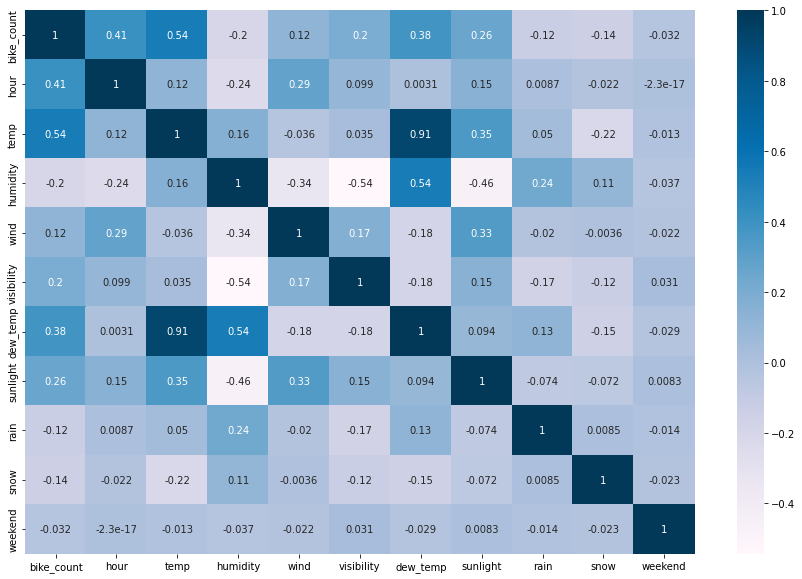

In [23]:
#checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PuBu',annot=True)

In [24]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [25]:
calc_vif(df[[i for i in df.describe().columns if i not in ['bike_count','dew_temp'] ]])

,variables,VIF
0,hour,3.928368
1,temp,3.235107
2,humidity,4.994594
3,wind,4.609643
4,visibility,4.793304
5,sunlight,2.254053
6,rain,1.079347
7,snow,1.121232
8,weekend,1.398741


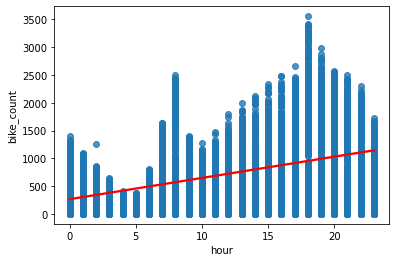

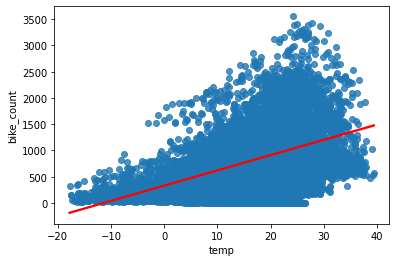

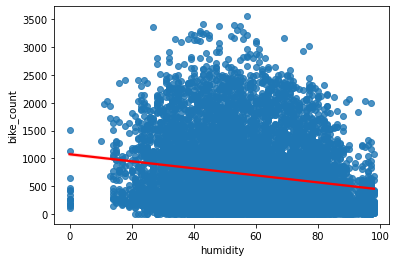

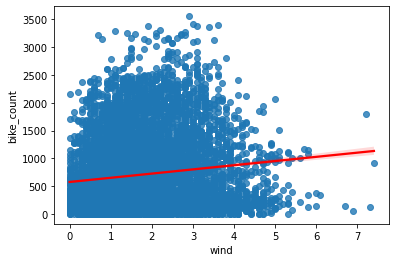

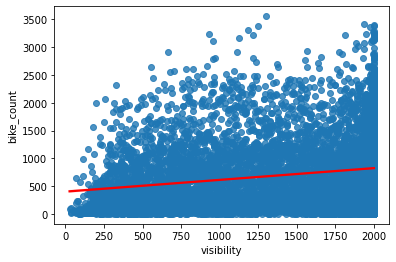

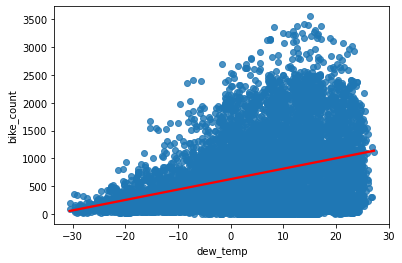

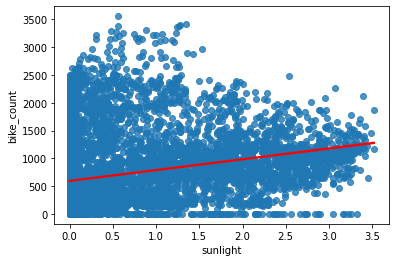

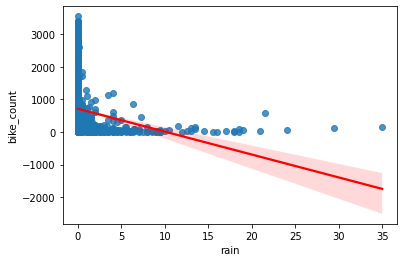

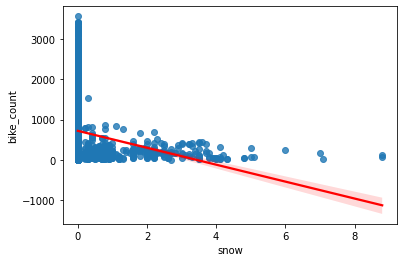

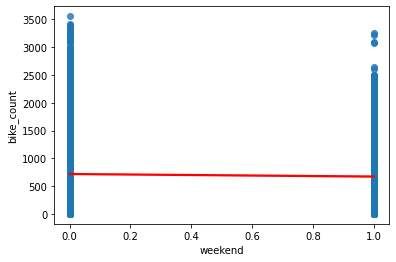

In [26]:
# ploting Regression plot of each columns of dataset v/s bike_count columns

for col in numeric_features[:]:
  if col == 'bike_count':
    pass
  else:
    sns.regplot(x=df[col],y=df["bike_count"],line_kws={"color": "red"})
  
  plt.show()

In [27]:
#INCLIDE'OBJECT'
categorical_features= df.select_dtypes(include='object')
categorical_features

,season,holiday,functioning_day,timeshift
0,Winter,No Holiday,Yes,night
1,Winter,No Holiday,Yes,night
2,Winter,No Holiday,Yes,night
3,Winter,No Holiday,Yes,night
4,Winter,No Holiday,Yes,night
...,...,...,...,...
8755,Autumn,No Holiday,Yes,evening
8756,Autumn,No Holiday,Yes,evening
8757,Autumn,No Holiday,Yes,evening
8758,Autumn,No Holiday,Yes,evening


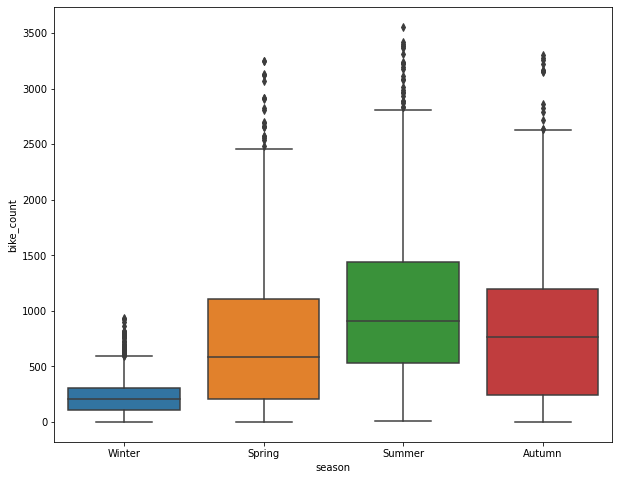

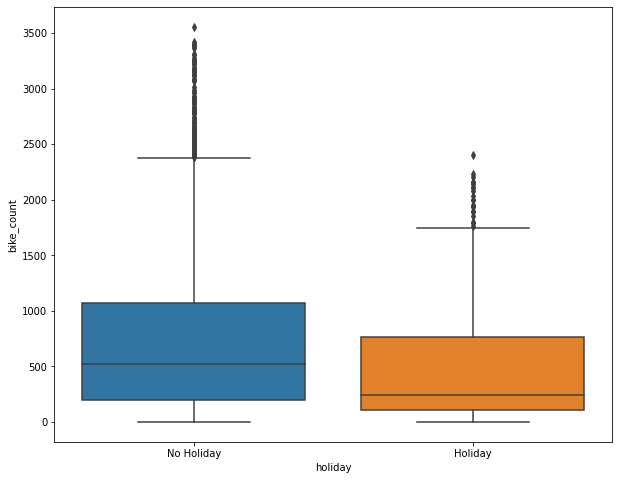

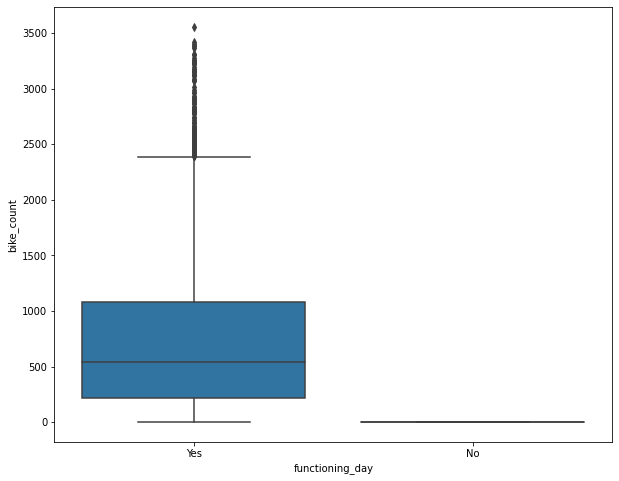

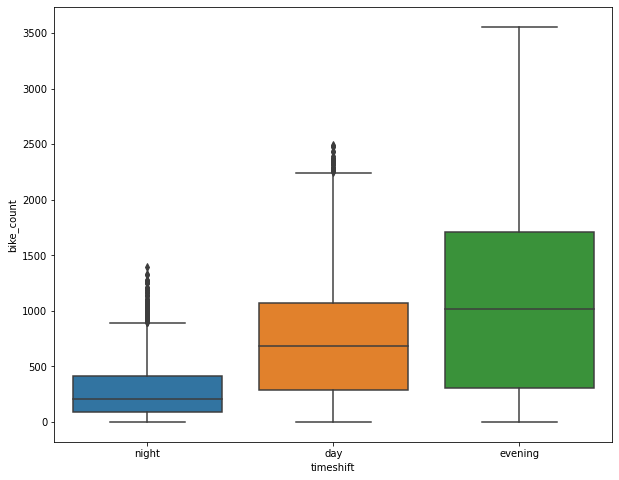

In [28]:
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df['bike_count'])
  

CONCLUSION
1. IN TIME SHIFT DAY AND NIGHT HAVE LESS BIKE DEMAND AS COMPARE TO EVENING
2. ON FUNCTIONAL DAY HAVE GREAT BIKE DEMAND
3. IN WINTER BIKE DEMAND HAVE LESS

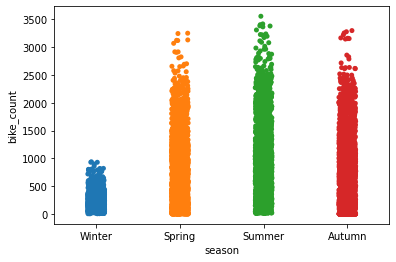

In [29]:
#ploting cat plot for more info
sns.stripplot(x='season',y='bike_count',data=df)

In [30]:
avg_rent_hrs = df.groupby('hour')['bike_count'].mean()

In [31]:
avg_rent_hrs

hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: bike_count, dtype: float64

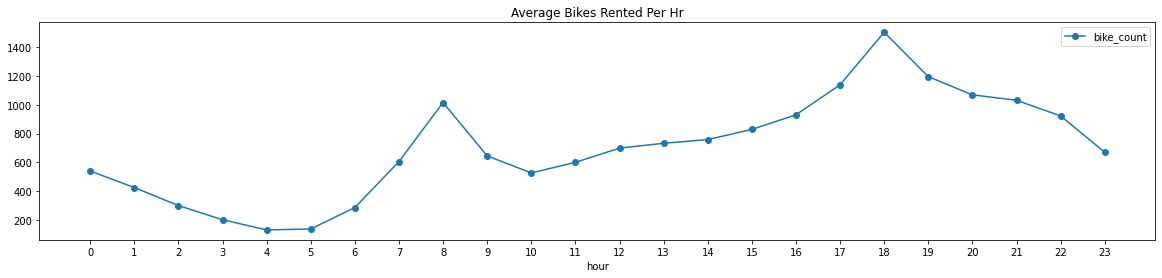

In [32]:
#ploting line graph
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)))
plt.show()

CONCLUSION
PEOPLE PREFERED RENTED BIKE DURING 8:00 AM TO 9:00 PM 

#one hot encoding

In [33]:
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

,season_Spring,season_Summer,season_Winter,holiday_No Holiday,functioning_day_Yes,timeshift_evening,timeshift_night
0,0,0,1,1,1,0,1
1,0,0,1,1,1,0,1
2,0,0,1,1,1,0,1
3,0,0,1,1,1,0,1
4,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...
8755,0,0,0,1,1,1,0
8756,0,0,0,1,1,1,0
8757,0,0,0,1,1,1,0
8758,0,0,0,1,1,1,0


In [34]:
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
final_df.head()

,season_Spring,season_Summer,season_Winter,holiday_No Holiday,functioning_day_Yes,timeshift_evening,timeshift_night,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,weekend
0,0,0,1,1,1,0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,0,0,1,1,1,0,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2,0,0,1,1,1,0,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
3,0,0,1,1,1,0,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
4,0,0,1,1,1,0,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


In [35]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
season_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
season_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
functioning_day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
timeshift_evening,8760.0,0.291667,0.454556,0.0,0.00,0.00,1.00,1.00
timeshift_night,8760.0,0.291667,0.454556,0.0,0.00,0.00,1.00,1.00
bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temp,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40


In [36]:
df.columns

Index(['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility',
       'dew_temp', 'sunlight', 'rain', 'snow', 'season', 'holiday',
       'functioning_day', 'weekend', 'timeshift'],
      dtype='object')

<Figure size 2000x1600 with 0 Axes>

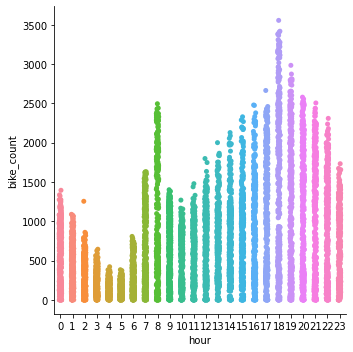

<Figure size 2000x1600 with 0 Axes>

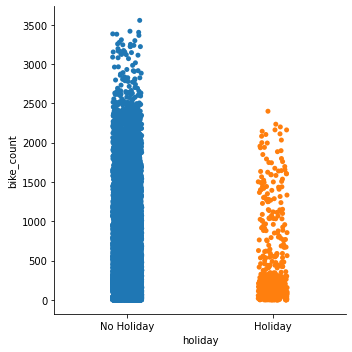

<Figure size 2000x1600 with 0 Axes>

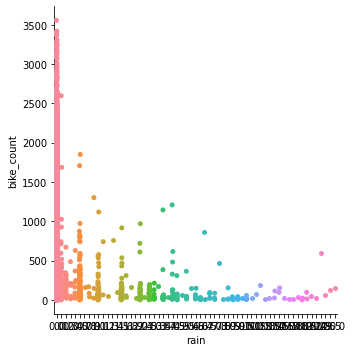

<Figure size 2000x1600 with 0 Axes>

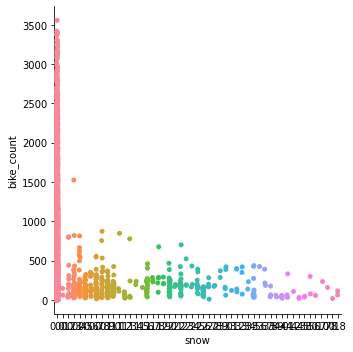

<Figure size 2000x1600 with 0 Axes>

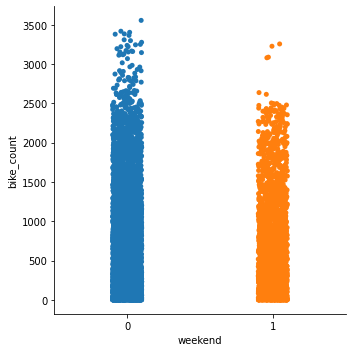

In [37]:
feature_list=["hour","holiday",'rain','snow','weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='bike_count',data=df)
  plt.show()

Conclusion:

**From hour v/s rented bike**
- we can clearly see there is high demand of Rented bike between the office hours.

**From working-nonworking v/s rented bike**

- As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

**From Rainfall v/s rented bike**

- we can see that if Rainfall increase demand of Rented Bike Decreases


**From Snowfall v/s rented bike**

- we can see that if Snowfall increase demand of Rented Bike Decreases

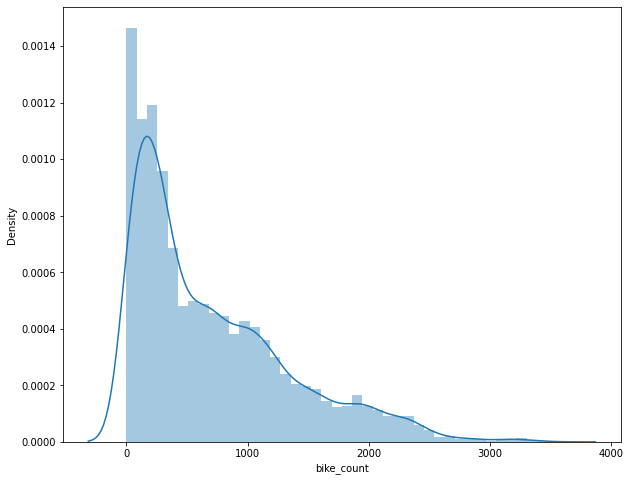

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(df['bike_count'])

square_root transformation

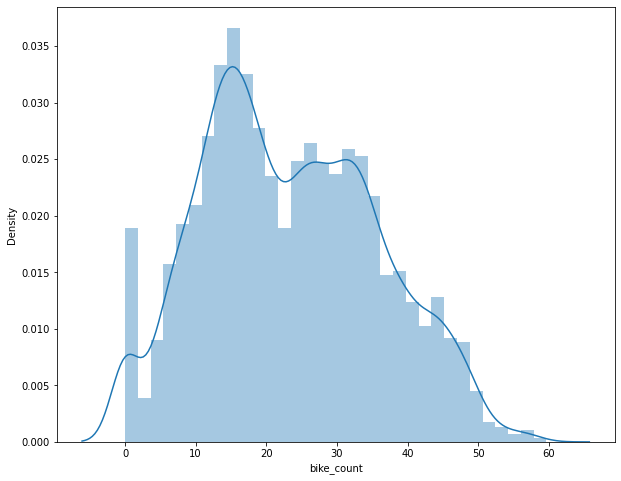

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['bike_count']))

# **CREATING FUNCTION**

In [40]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]


# creating function for linear models

In [41]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n****************  |Matrix|  ****************\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adj R2 : ",adj_r2)
  
  print('\n****************  |Matrix|  ****************\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting for actual and predicted values
  print('\
    ***********************************************\
   |Graph|\
    ***********************************************\n')  
  plt.figure(figsize=(20,10))
  plt.plot(np.array(y_test[:100]))
  plt.plot(pred[:100])    
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
  plt.show()

## creating function for decimal tree models

In [42]:

def dac_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [43]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


# Train | Test Split for LR

In [44]:
# Train - Spliting  data
X=final_df.drop(['bike_count'],axis=1)

In [45]:
X.shape

(8760, 17)

In [46]:
y=np.sqrt(final_df['bike_count'])

In [47]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [48]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [49]:
X_train

array([[-0.57488971, -0.58004517,  1.72749323, ..., -0.12795769,
         4.46880116, -0.63265769],
       [-0.57488971,  1.72400366, -0.57887347, ..., -0.12795769,
        -0.17658844, -0.63265769],
       [-0.57488971, -0.58004517, -0.57887347, ..., -0.12795769,
        -0.17658844, -0.63265769],
       ...,
       [-0.57488971, -0.58004517,  1.72749323, ..., -0.12795769,
        -0.17658844,  1.58063359],
       [-0.57488971,  1.72400366, -0.57887347, ..., -0.12795769,
        -0.17658844, -0.63265769],
       [-0.57488971, -0.58004517,  1.72749323, ..., -0.12795769,
        -0.17658844, -0.63265769]])

# linear regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
#linear regression model

linear_model= LinearRegression()


****************  |Matrix|  ****************

MSE : 143456.60723315532
RMSE : 378.7566596551872
R2 : 0.6510702781520523
Adj R2 :  0.6483392444175149

****************  |Matrix|  ****************

    ***********************************************   |Graph|    ***********************************************



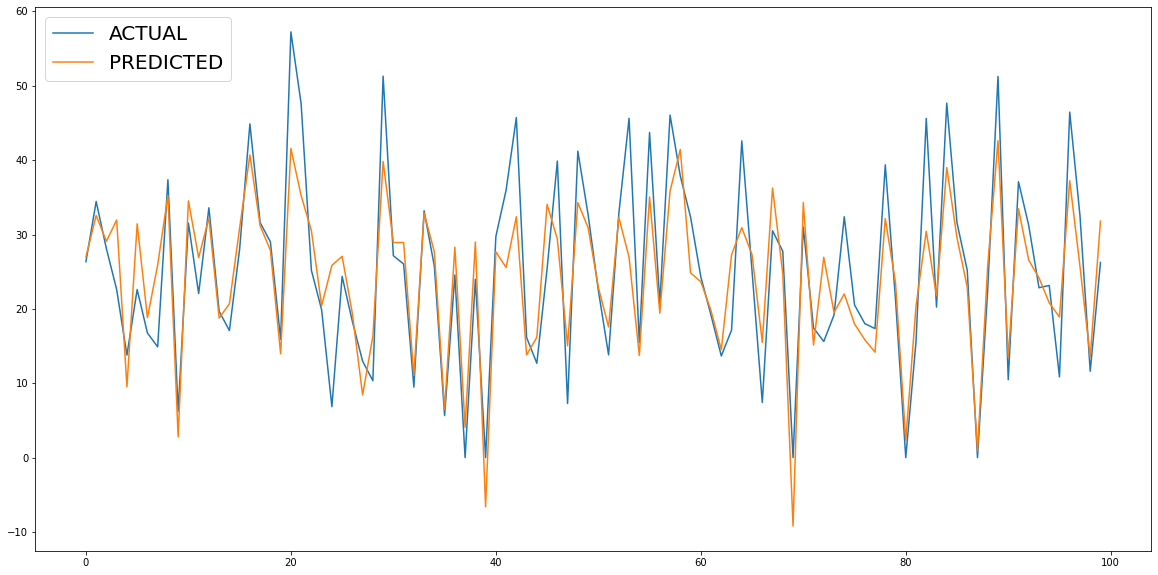

In [52]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

In [53]:
model=LinearRegression().fit(X_train, y_train)
preds = model.predict(X_test)

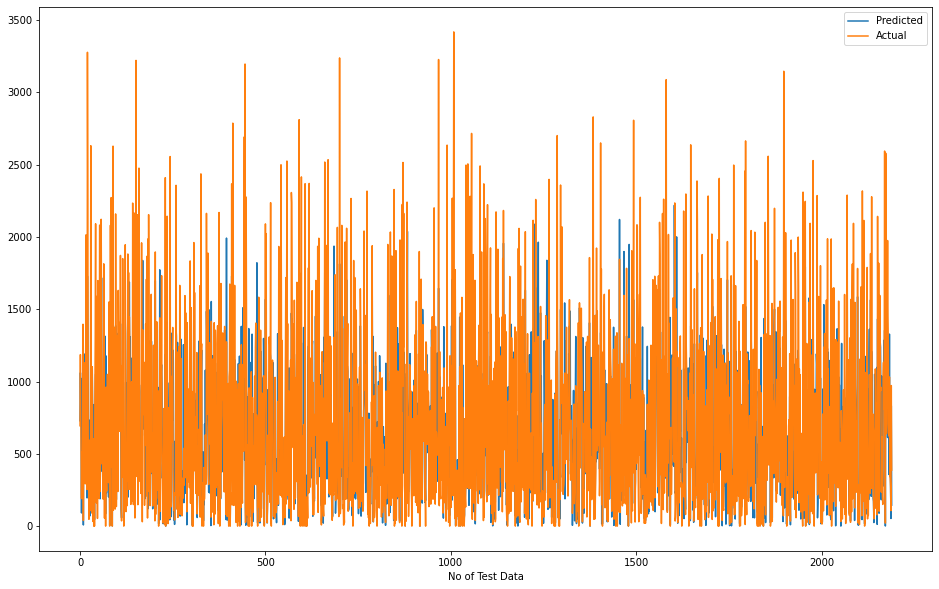

In [54]:
plt.figure(figsize=(16,10))
plt.plot((preds)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 6.79999999999999, 'Actual Values')

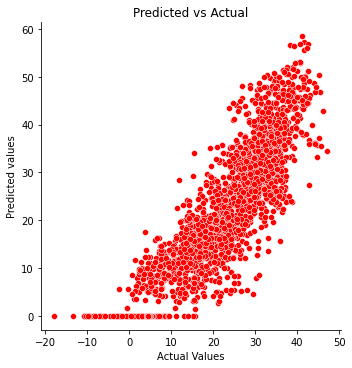

In [55]:
sns.relplot(x=preds ,y=y_test,color='red')
plt.title('Predicted vs Actual')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

# LASSO REGRESSIONS 

In [56]:
from sklearn.linear_model import Lasso

In [57]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


****************  |Matrix|  ****************

MSE : 143543.00339555397
RMSE : 378.87069482285636
R2 : 0.65086013663612
Adj R2 :  0.6481274581475445

****************  |Matrix|  ****************

    ***********************************************   |Graph|    ***********************************************



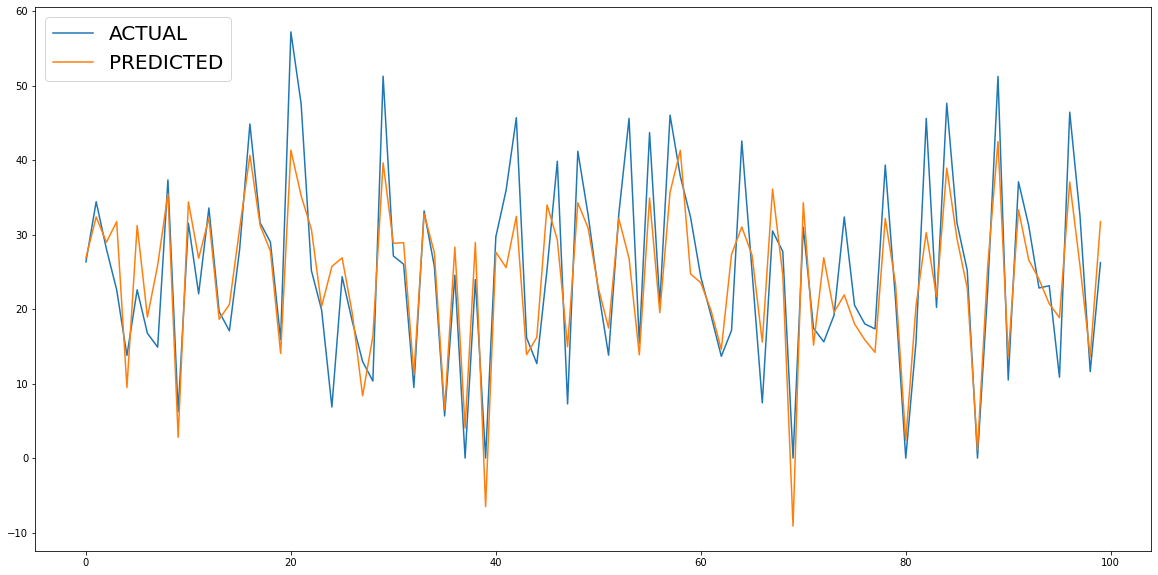

In [58]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

##Ridge Regression

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


****************  |Matrix|  ****************

MSE : 143376.03242381327
RMSE : 378.650277200233
R2 : 0.651266260382177
Adj R2 :  0.6485367605785385

****************  |Matrix|  ****************

    ***********************************************   |Graph|    ***********************************************



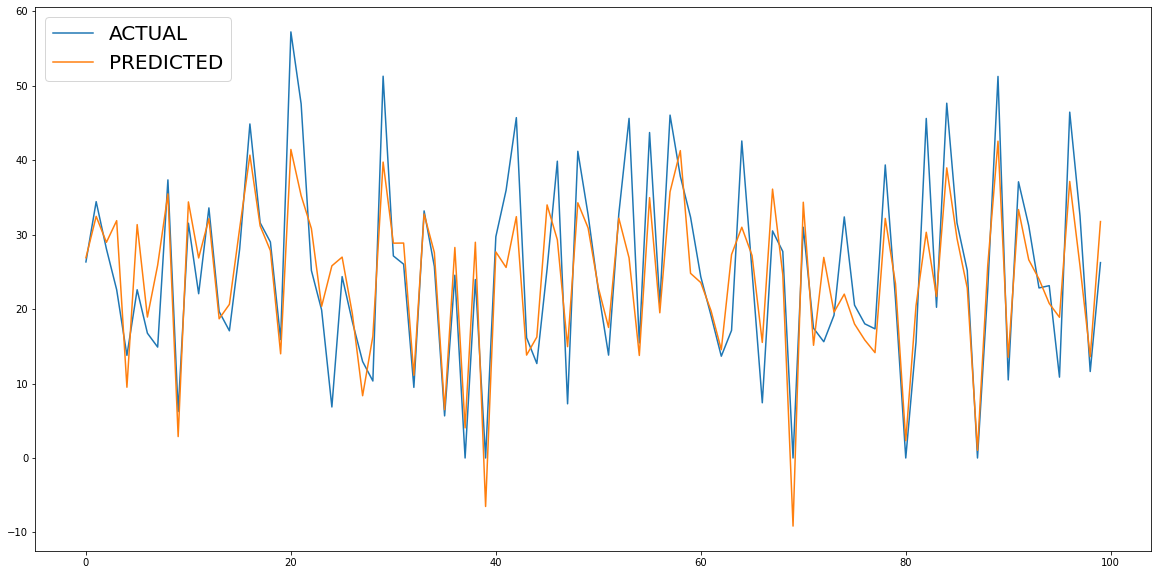

In [60]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

# Decision Tree Regression

# Train | Test split Data For Tree based methods

In [61]:
#creatin X for independent variable
X=final_df.drop(['bike_count'],axis=1)

In [62]:
#creating y for dependent variable
y=final_df['bike_count']

In [63]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 98772.56484018265
RMSE : 314.2810284445796
R2 : 0.7586209004942872
Adjusted R2 :  0.7567316533987084

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



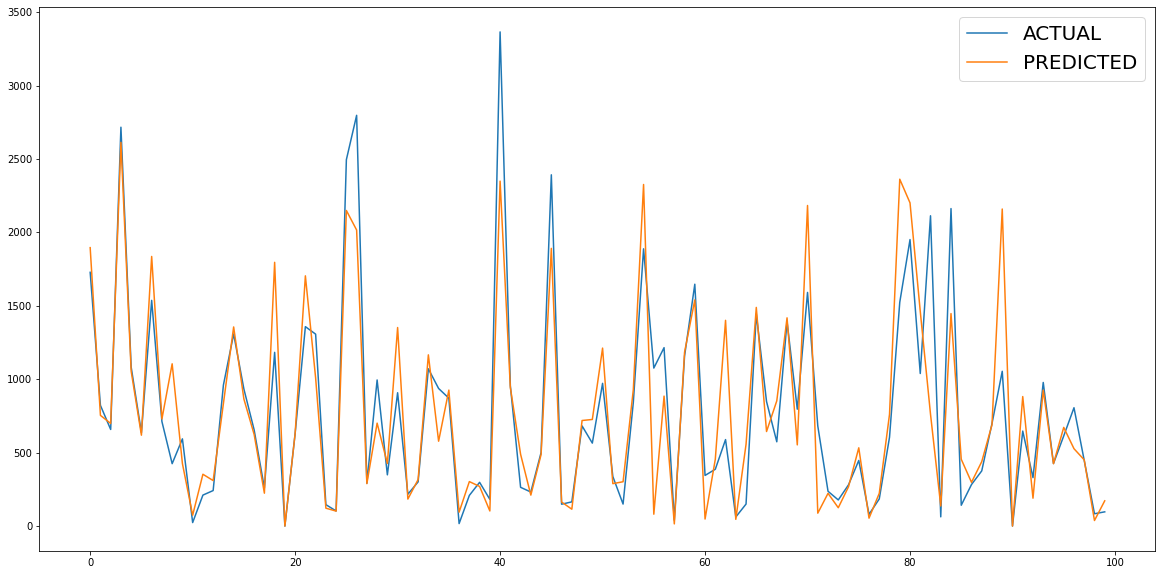

In [65]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
cv=dac_model(dt_model,X_train,y_train,X_test,y_test)

In [66]:
features= X_train.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)

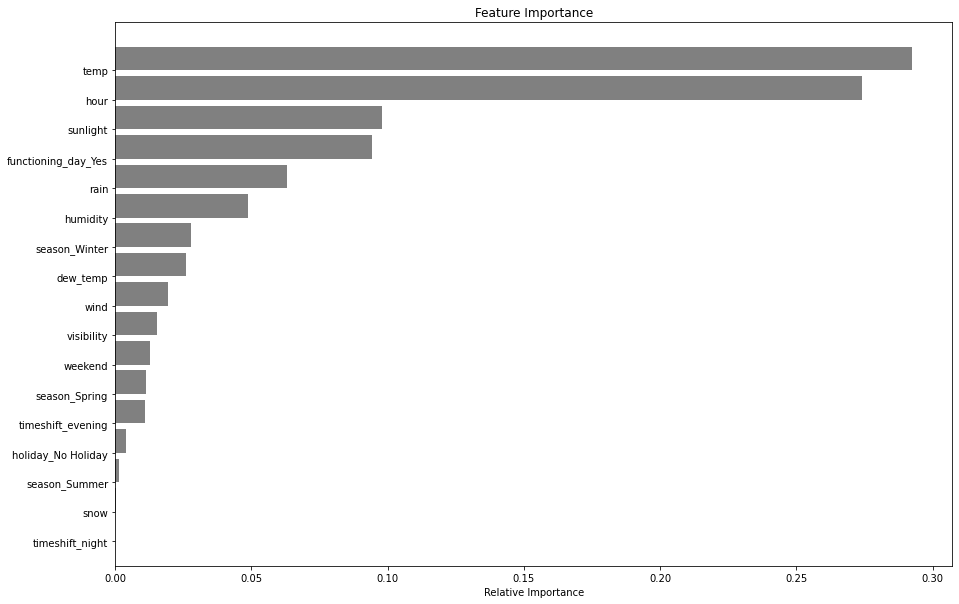

In [67]:
#getting features importance of decision tree
features= X_train.columns
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='grey', align='edge')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Random Forest Regression


================Evalution Matrix=========================

MSE : 46778.79084936073
RMSE : 216.28405130605617
R2 : 0.8856826039755606
Adjusted R2 :  0.8847878545591631

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



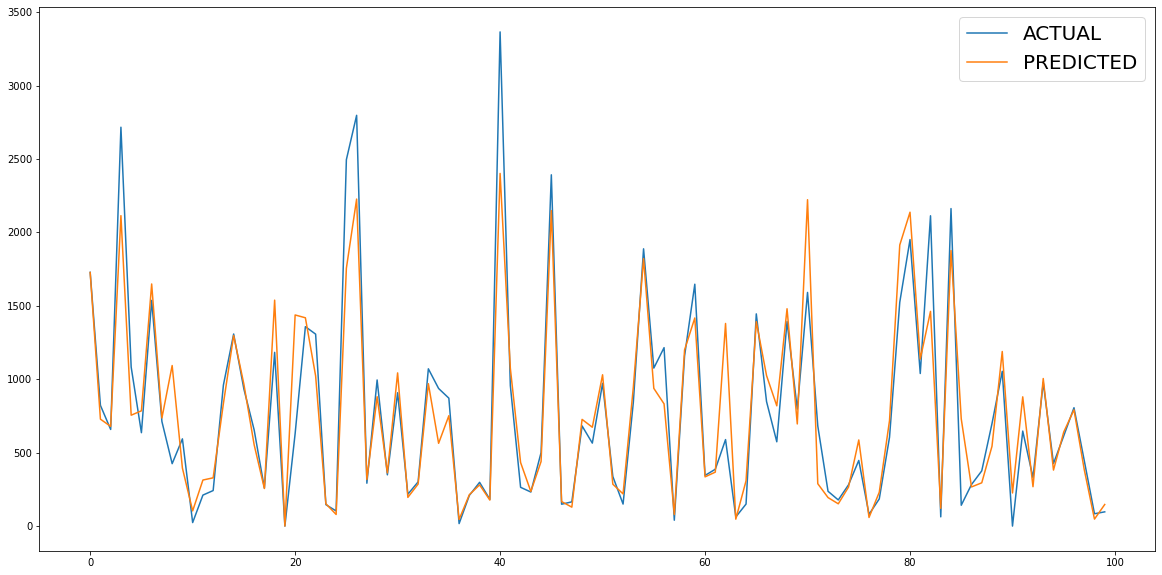

In [68]:
#creating decision tree model
rf_model = RandomForestRegressor()
#calling run_model to train,fit and evalution of decision tree model
dac_model(rf_model,X_train,y_train,X_test,y_test)

In [69]:
rf_model.score(X_train,y_train)

0.9850404628062159

In [70]:
rf_model.score(X_test,y_test)

0.8856826039755606

In [71]:
y_pred_train=rf_model.predict(X_train)
y_pred=rf_model.predict(X_test)

# Gradient Boosting Regression


================Evalution Matrix=========================

MSE : 69123.22431714075
RMSE : 262.912959583853
R2 : 0.831077570299004
Adjusted R2 :  0.8297554334182872

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



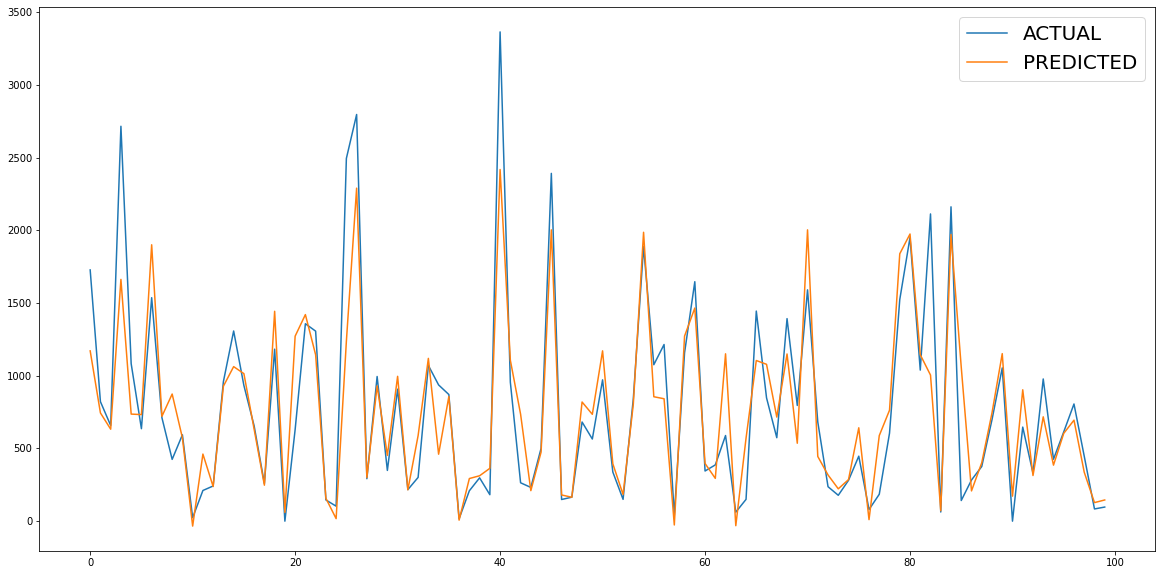

In [72]:
gra_boost=GradientBoostingRegressor()
dac_model(gra_boost,X_train,y_train,X_test,y_test)

# Xtreme Gradient Boosting

In [73]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [74]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [75]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[06:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

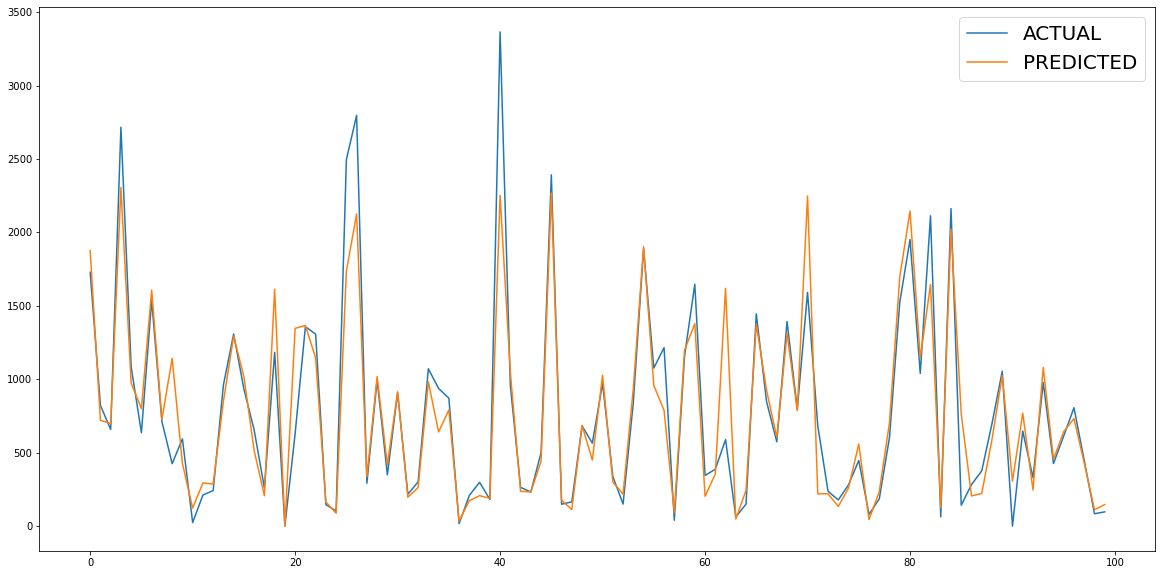

In [76]:
#calling run_model to train,fit and evalution of xgb_grid model
dac_model(xgb_grid,X_train,y_train,X_test,y_test);

In [77]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

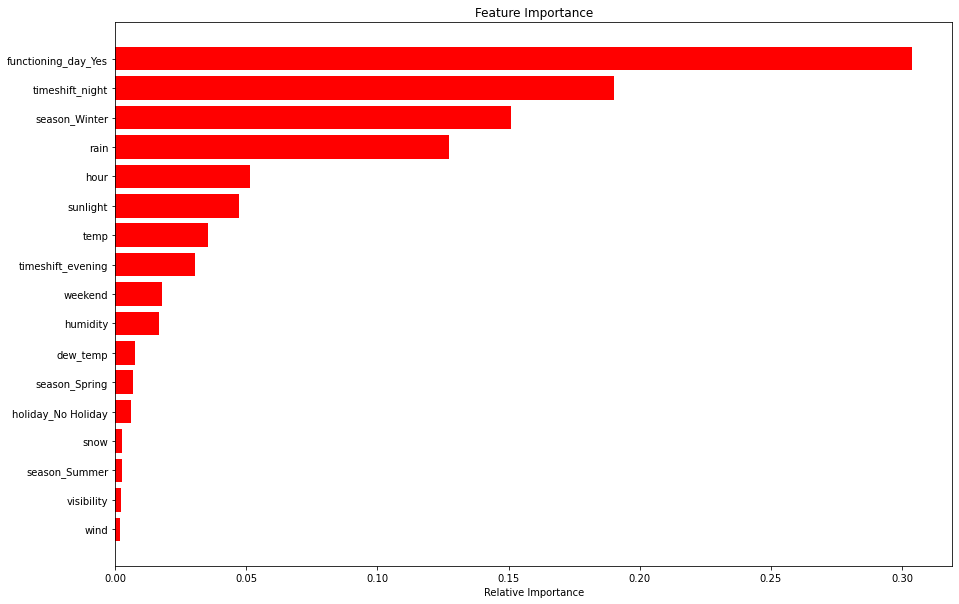

In [78]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

# light GBM

In [79]:
import lightgbm as lgb

In [80]:
lgbr=lgb.LGBMRegressor()

In [81]:
# finding the best parameters for XGBRegressor by gridsearchcv for the best result
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 40840.23865560875
RMSE : 202.0896797355292
R2 : 0.900195159999745
Adjusted R2 :  0.8994139987290247

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



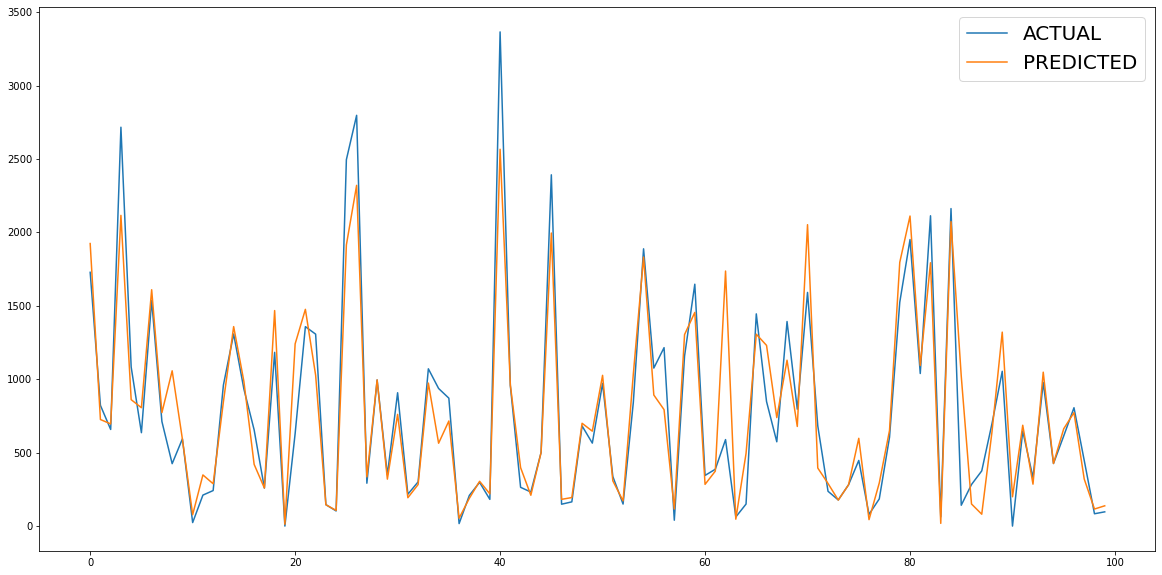

In [82]:
#calling run_model to train,fit and evalution of catboost model
dac_model(lgbr_grid,X_train,y_train,X_test,y_test)

# creating a list

In [83]:
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [84]:
model_name=['Linear','Lasso','Ridge','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','light_lgb']

In [85]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices)
matrices_df

,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,143456.607233,378.756660,0.651070,0.648339
1,143543.003396,378.870695,0.650860,0.648127
2,143376.032424,378.650277,0.651266,0.648537
3,98772.564840,314.281028,0.758621,0.756732
4,46778.790849,216.284051,0.885683,0.884788
5,69123.224317,262.912960,0.831078,0.829755
6,46458.605386,215.542584,0.886465,0.885576
7,40840.238656,202.089680,0.900195,0.899414


In [86]:
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [87]:
matrices_df

,Linear,Lasso,Ridge,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB,light_lgb
Mean_square_error,143456.607233,143543.003396,143376.032424,98772.564840,46778.790849,69123.224317,46458.605386,40840.238656
Root_Mean_square_error,378.756660,378.870695,378.650277,314.281028,216.284051,262.912960,215.542584,202.089680
R2,0.651070,0.650860,0.651266,0.758621,0.885683,0.831078,0.886465,0.900195
Adjusted_R2,0.648339,0.648127,0.648537,0.756732,0.884788,0.829755,0.885576,0.899414


## **Final conclusion**

1.No overfitting is seen, as we can see the models are performing well with the test data with good results.

2.After performing the various models the lightGBM and Xtreme Gradient Boosting found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the lightGBM and Xtreme Gradient Boosting models !

3.In holiday or non-working days there is demands in rented bikes.

4.People preferred more rented bikes in the morning than the evening.

5.When the rainfall was less, people have booked more bikes except some few cases.

6.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

7.We can use either lightGBM or catboost model for the bike rental stations.
